<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Librerias/Actividad02_Librerias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



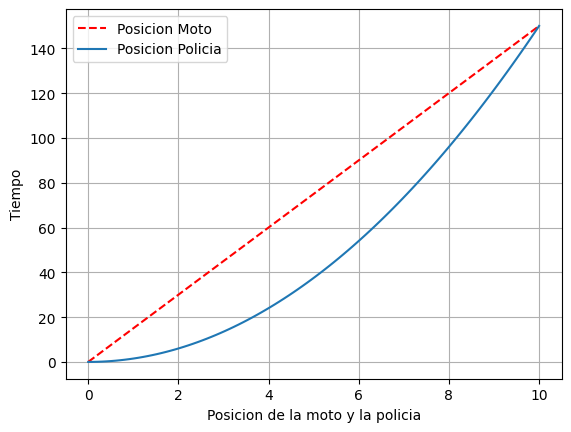

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = 10
def moviminetomoto(t):
    #esta funcion se utiliza para calcular el la posicion de la moto en cada segundo siendo i hasta t que el tiempo final
    vm = 15
    tiempo = np.linspace(0,t,100)
    moto = []
    for i in tiempo:
        xfm = vm*i
        moto.append(xfm)
         
    return moto
def movimientopolicia(t):
    policia = []
    tiempo = np.linspace(0,t,100)
    a = 3
    for i in tiempo:
        xfp = 0.5 * a * i**2
        policia.append(xfp)
    return policia
tiempo = np.linspace(0,t,100)
x1 = np.array(moviminetomoto(t))
y = np.array(tiempo)
x2 = np.array(movimientopolicia(t))

plt.plot(y, x1, "r--", label = "Posicion Moto")
plt.plot(y, x2, label = "Posicion Policia")
plt.legend()
plt.xlabel("Posicion de la moto y la policia")
plt.ylabel("Tiempo")
plt.grid()

---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




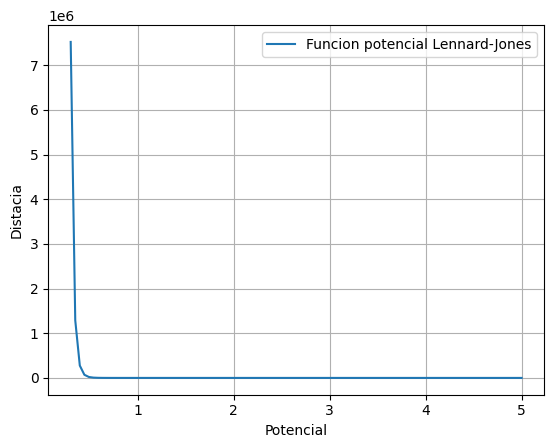

In [2]:
sigma = 1
epsilon = 1
r = np.linspace(0.3, 5, 100)
potencial_Lennard = lambda sigma, epsilon, r: 4*epsilon * ((sigma/r)**12 - (sigma/r)**6)
            #esta funcion esta dada para el potencial en funcion de la distancia interatomica dependiente de 
            #r = distancia entre dos particula,  o = parametro de distancia,  e = profundidad del pozo de potencial
y = potencial_Lennard(sigma, epsilon, r)

plt.plot(r, y, label = "Funcion potencial Lennard-Jones")
plt.ylabel("Distacia")
plt.xlabel("Potencial")
plt.grid()
plt.legend()

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [3]:
import pandas as pd
#primeramente en el siguietne codigo se leen los dos url y le imprimen como columnas definiendo cada una de estas como se ve en la pagina para mayo facilidad
url_alturas = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
alturas = pd.read_html(url_alturas)[0]

print(alturas.columns)


alturas.columns = ['Rank', 'País', 'Niños (cm)', 'Niñas (cm)', 'Diferencia Niño-Niña (cm)', 'Fuente'] 

# Dataset de riqueza
url_income = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
income = pd.read_html(url_income)[0]

income.columns = ['País', 'Riqueza Promedio (USD)',"prueba", "prueba2","prueba3","prueba4"]

print(alturas.head())
print(income.head())

ImportError: Missing optional dependency 'lxml'.  Use pip or conda to install lxml.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# se llaman las columnas de las aultiras de los niños y niñas para pasarlas como valores numericos de esta mnera poder organizarlas
alturas['Niños (cm)'] = pd.to_numeric(alturas['Niños (cm)'], errors='coerce')
alturas['Niñas (cm)'] = pd.to_numeric(alturas['Niñas (cm)'], errors='coerce')

# creo una variable para esta manera poder organizarlos en valores como se desee
#en este caso utilizo la funcion de sort_values para esta manera acomodar los datos
alturas_sorted = alturas.sort_values(by='Niños (cm)', ascending=False)

# aqui en esta primera tomo los 10 valores en la cabeza o el punto mas alto
top10 = alturas_sorted.head(10)

# aquie lo mismo pero los diez mas bajos 
bajos10 = alturas_sorted.tail(10)

# en este caso se llama a colombia utilizando las funciones de atras para acotar las alturas deseadas
colombia = alturas[alturas['País'] == 'Colombia']

# en esta ultima se juntan las columnas deseadas
seleccion = pd.concat([top10, bajos10, colombia])

# Gráfico
plt.figure(figsize=(14, 7))
seleccion_plot = seleccion.set_index('País')[['Niños (cm)', 'Niñas (cm)']]
seleccion_plot.plot(kind='bar', figsize=(14, 7), colormap='Paired')

plt.title("Comparación de estatura media (cm) por país - Niños y Niñas (19 años)")
plt.ylabel("Estatura (cm)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

NameError: name 'alturas' is not defined